In [1]:
from mp1 import generate_dataset_denoising
from keras.models import Sequential
from keras.layers import Dense, Activation, Input, Add
from keras.layers import Conv2D, MaxPool2D, Conv2DTranspose
from pandas import get_dummies

import matplotlib.pyplot as plt
import keras
import numpy as np

[x_train, t_train] = generate_dataset_denoising(1000, 100)

Using TensorFlow backend.


# Training Hourglass Network

In [2]:
inpt = Input(shape=(100, 100, 1))

# Encode
h1 = Conv2D(filters=16, kernel_size=(3,3), padding='same', input_shape=(100,100,1), activation='relu')(inpt) # (100, 100, 16)
h2 = MaxPool2D(pool_size=(2, 2))(h1)
h2 = Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(h2) # (50, 50, 32)
h3 = MaxPool2D(pool_size=(2, 2))(h2)
h3 = Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(h3) # (25, 25, 64)

h4 = MaxPool2D(pool_size=(2, 2), padding='valid')(h3)
h4 = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(h4) # (12, 12, 128)
h5 = Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(h4) # (12, 12, 128)

# Decode
h6 = Conv2DTranspose(filters=64, strides=(2, 2), kernel_size=(3, 3), padding='valid', activation='relu')(h5) # (25, 25, 64)
h6 = Add()([h6, h3])
h7 = Conv2DTranspose(filters=32, strides=(2, 2), kernel_size=(3, 3), padding='same', activation='relu')(h6) # (50, 50, 32)
h7 = Add()([h7, h2])
h8 = Conv2DTranspose(filters=16, strides=(2, 2), kernel_size=(3, 3), padding='same', activation='relu')(h7) # (100, 100, 16)
h8 = Add()([h8, h1])
h9 = Conv2D(filters=1, kernel_size=(3,3), padding='same', activation='sigmoid')(h8) # (100, 100, 1)

# Training
cnn = keras.Model(inputs=inpt, outputs=h9)
adam = keras.optimizers.Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
cnn.compile(loss='mean_squared_error', optimizer=adam)
cnn.fit(np.reshape(x_train, (-1, 100, 100, 1)), np.reshape(t_train, (-1, 100, 100, 1)), epochs=50, batch_size=32)

Epoch 1/50
1000/1000 [==============================] - 7s 7ms/step - loss: 0.2150
Epoch 2/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1737
Epoch 3/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.1215
Epoch 4/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0773
Epoch 5/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0635
Epoch 6/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0490
Epoch 7/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0147
Epoch 8/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0095
Epoch 9/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0084
Epoch 10/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0079
Epoch 11/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0075
Epoch 12/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0070
E

# Test

In [3]:
y_train = cnn.predict(np.reshape(x_train, (-1, 100, 100, 1)))

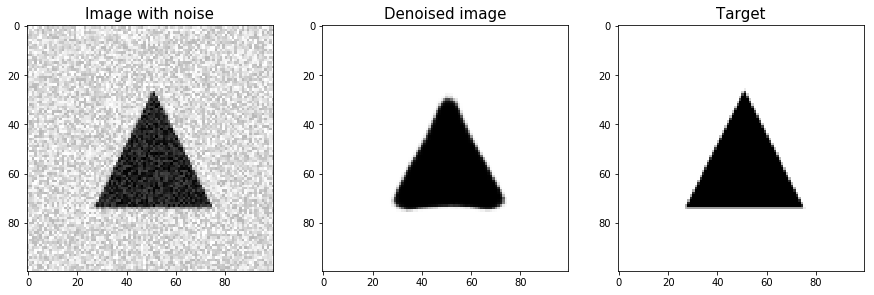

In [7]:
%matplotlib inline
idx=9

fig, ax = plt.subplots(1, 3, figsize=(15, 8))
ax[0].imshow(np.reshape(x_train[idx], (100, 100)), cmap='gray')
ax[0].set_title('Image with noise', fontsize=15)
ax[1].imshow(y_train[idx, :, :, 0], cmap='gray')
ax[1].set_title('Denoised image', fontsize=15)
ax[2].imshow(np.reshape(t_train[idx], (100, 100)), cmap='gray')
ax[2].set_title('Target', fontsize=15)
plt.show()